## Лабораторная работа №7

In [2]:
import pandas as pd
import joblib

from ml_library.k_fold import k_fold

In [3]:

import warnings
warnings.filterwarnings('ignore')


In [4]:
data_regression = pd.read_csv('data_regression_modified.csv')
data_class = pd.read_csv('data_class_modified.csv')

In [5]:
y_reg = data_regression['price']
y_class = data_class['danger']
X_reg = data_regression.drop(columns=['price', 'Unnamed: 0'])
X_class = data_class.drop(columns=['danger', 'Unnamed: 0'])

In [6]:
from sklearn.model_selection import train_test_split
from ml_library.metrics import custom_classifier_metrics
from ml_library.metrics_regression import print_error

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler_reg  = StandardScaler()
X_scaled_reg = scaler_reg.fit_transform(X_reg)
X_scaled_class = scaler.fit_transform(X_class)
X_scaled_class = pd.DataFrame(X_scaled_class, columns=X_class.columns)
X_scaled_reg = pd.DataFrame(X_scaled_reg,columns=X_reg.columns )

In [9]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_scaled_reg, y_reg, test_size=0.2)

X_class_train, X_class_test, y_class_train, y_class_test= train_test_split(X_scaled_class, y_class, test_size=0.2, stratify=y_class)

## Использование фреймворка Tensorflow и API Keras для решения задачи <span style= "color:rgb(187, 223, 150)  ">классификации</span> и <span style="color:rgb(154, 193, 240) ">регрессии</span>

In [10]:
import tensorflow as tf
import numpy as np

### <span style="color:rgb(154, 193, 240) ">Регрессия</span>

In [10]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold


In [74]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation='linear', input_shape= (4,)),

        tf.keras.layers.Dense(32, activation='linear'),

        tf.keras.layers.Dense(16, activation='linear'),

        tf.keras.layers.Dense(1, activation='linear'),
    ]
)

model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

In [75]:
model_regression.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model_regression.fit(X_reg_train, y_reg_train, epochs=80)

Epoch 1/80


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1474.9829
Epoch 2/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 434.2832
Epoch 3/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 280.7682
Epoch 4/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 299.9397
Epoch 5/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 272.9389
Epoch 6/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 270.6862
Epoch 7/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 267.1979
Epoch 8/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 264.2768
Epoch 9/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 287.6094
Epoch 10/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.9502
Epoch 11/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 263.2237
Epoch 12/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 280.1098
Epoch 13/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255.9804
Epoch 14/80
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230.4780
Epoch 15/80
156/156 ━━━━━━━━━━━━━━━━━━━

In [77]:
y_pred_reg = pd.Series(model_regression.predict(X_reg_test).flatten())

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [78]:
y_reg_test = y_reg_test.reset_index(drop=True)
y_reg_test

0       18.50
1        6.50
2        3.84
3        5.00
4       40.00
        ...  
1243    19.00
1244    22.00
1245    25.20
1246    12.50
1247     6.80
Name: price, Length: 1248, dtype: float64

In [79]:
from sklearn.metrics import r2_score

print_error(y_reg_test, y_pred_reg, custom=True)

               Метрики качества
MAE                     9.16110
MSE                   276.10203
RMSE                   16.61632
MAPE                    0.67673
Adjusted_rand           0.00038
R^2                     0.63973


### <span style= "color:rgb(187, 223, 150)  ">Классификация</span>

In [53]:
model_classification_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(2, activation="softmax"),
    ]
)

model_classification_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), loss="sparse_categorical_crossentropy")

model_classification_1.fit(X_class_train, y_class_train, epochs=30)

Epoch 1/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2861
Epoch 2/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2648
Epoch 3/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2572
Epoch 4/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2607
Epoch 5/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2600
Epoch 6/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2588
Epoch 7/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2624
Epoch 8/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2601
Epoch 9/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2617
Epoch 10/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2589
Epoch 11/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2578
Epoch 12/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2578
Epoch 13/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2593
Epoch 14/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2565
Epoch 15/30
1750/1750 ━━━━━━━

In [54]:
model_classification_1.predict(X_class_test, verbose=None)

array([[1.3310379e-01, 8.6689621e-01],
       [1.0000000e+00, 4.1108560e-08],
       [1.0000000e+00, 3.2579516e-16],
       ...,
       [2.3292282e-01, 7.6707721e-01],
       [1.0000000e+00, 6.5528524e-18],
       [1.3310379e-01, 8.6689621e-01]], dtype=float32)

In [55]:
y_pred = [np.argmax(pred) for pred in model_classification_1.predict(X_class_test, verbose=None)]

In [56]:
y_class_pred = pd.Series(y_pred)

In [57]:
y_class_test = y_class_test.reset_index(drop=True)

In [ ]:
from sklearn.metrics import classification_report

In [59]:
custom_classifier_metrics(y_test=y_class_test, y_pred=y_class_pred)

                 Метрики качества
accuracy_score             0.9031
precision_score            0.8415
recall_score               0.9934
f1_score                   0.9112
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   5690     1310 |
Predicted  Class 1  |     46     6954 |
-----------------------------------


### **ПОДБОР ГИПЕРПАРАМЕТРОВ** (для моделей MLP)
 
#### Классификация

In [10]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from ml_library.hyperparams import optuna_params, randomizedSearchCV_params
from ml_library.k_fold import k_fold

In [11]:
import optuna
from sklearn.metrics import accuracy_score, mean_squared_error

In [81]:
def optuna_get_best_params(X_train, y_train, X_test, y_test, model : str):
    if model == "class":
        model_class=  MLPClassifier
        metric_func = accuracy_score
        dir = 'maximize'
    elif model == 'reg':
        model_class = MLPRegressor
        metric_func = mean_squared_error
        dir = 'minimize'
    def objective(trial):
        optimizer = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
        act_func = trial.suggest_categorical('activation', ['relu', 'logistic', 'tanh'])
        alpha = trial.suggest_categorical('alpha', [1e-5, 1e-4, 1e-3, 1e-2])
        hidden_layer_1 = trial.suggest_int('hidden_layer_1', 10, 50)
        hidden_layer_2 = trial.suggest_int('hidden_layer_2', 10, 50)
        batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
        if optimizer != 'lbfgs':
            learning_rate_init = trial.suggest_categorical('learning_rate_init', [1e-4, 1e-3, 1e-2])
        else:
            learning_rate_init = 0.0001

        params = {
            'hidden_layer_sizes': (hidden_layer_1, hidden_layer_2),
            'activation': act_func,
            'solver': optimizer,
            'alpha': alpha,
            'early_stopping': True,
            'validation_fraction': 0.1,
            'max_iter': 500,
            'batch_size': batch_size,
            'learning_rate_init': learning_rate_init
        }

        mlp_model = model_class(**params)
        mlp_model.fit(X_train, y_train)


        y_pred = mlp_model.predict(X_test)
        score = metric_func(y_test, y_pred)
        return score
    
    return  optuna_params(objective=objective, aim= dir)


In [ ]:
best_MLPClass_params = optuna_get_best_params(X_class_train, y_class_train, X_class_test, y_class_test, 'class')

In [ ]:
params_neural ={
    "hidden_layer_sizes": [20,40, 60],
    "solver": ['lbfgs', 'sgd', 'adam'],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
}

In [ ]:
bp = best_MLPClass_params

In [ ]:
best_MLPClass_opuna = MLPClassifier(
    hidden_layer_sizes=(bp['hidden_layer_1'], 
                        bp['hidden_layer_2']), 
                        activation=bp['activation'], 
                        solver=bp['solver'],
                        alpha=bp['alpha'],
                        learning_rate_init=bp['learning_rate_init'],
                        batch_size=bp['batch_size']
                        ).fit(X_class_train, y_class_train)

In [599]:
best_MLPClass_opuna = joblib.load('MLPClassifier_optuna.joblib')

In [ ]:
y_pred_opt_class = pd.Series(best_MLPClass_opuna.predict(X_class_test))

0        0
1        1
2        1
3        0
4        1
        ..
13995    0
13996    0
13997    0
13998    0
13999    1
Length: 14000, dtype: int64

In [ ]:
custom_classifier_metrics(y_test=y_class_test, y_pred=y_pred_opt_class)

                 Метрики качества
accuracy_score             0.9052
precision_score            0.8456
recall_score               0.9914
f1_score                   0.9127
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   5733     1267 |
Predicted  Class 1  |     60     6940 |
-----------------------------------


In [602]:
k_fold(best_MLPClass_opuna, X_scaled_class, y_class, 'f1')

Оценки кросс-валидации на обучающем наборе [0.90163043 0.91733298 0.92046209 0.92391594 0.92084712]
Средняя оценка кросс-валидации на обучающем наборе 0.9168377123828245


np.float64(0.9168377123828245)

In [ ]:
best_MLPClassifier=  randomizedSearchCV_params(MLPClassifier(), parameters=params_neural, X_train=X_class_train, Y_train=y_class_train )

In [ ]:
y_pred_rand = pd.Series(best_MLPClassifier.predict(X_class_test))

In [ ]:
custom_classifier_metrics(y_pred=y_pred_rand, y_test=y_class_test)

                 Метрики качества
accuracy_score             0.9044
precision_score            0.8448
recall_score               0.9909
f1_score                   0.9120
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   5726     1274 |
Predicted  Class 1  |     64     6936 |
-----------------------------------


In [604]:
k_fold(best_MLPClassifier, X_scaled_class, y_class, 'f1')

Оценки кросс-валидации на обучающем наборе [0.9017766  0.91778203 0.92131711 0.92302597 0.92062442]
Средняя оценка кросс-валидации на обучающем наборе 0.9169052249848504


np.float64(0.9169052249848504)

### Регрессия

In [82]:
from sklearn.neural_network import MLPRegressor

**OPTUNA**

In [83]:
best_MLPRegressor_optuna_params = optuna_get_best_params(X_reg_train, y_reg_train, X_reg_test, y_reg_test, 'reg')

In [85]:
best_MLPRegressor_optuna_params

{'solver': 'lbfgs',
 'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_1': 24,
 'hidden_layer_2': 36,
 'batch_size': 64}

In [86]:

bp = best_MLPRegressor_optuna_params
best_MLPReg_optuna = MLPRegressor(
    hidden_layer_sizes=(bp['hidden_layer_1'], 
                        bp['hidden_layer_2']), 
                        activation=bp['activation'], 
                        solver=bp['solver'],
                        alpha=bp['alpha'],
                     
                        batch_size=bp['batch_size']
                        ).fit(X_reg_train, y_reg_train)

In [87]:
y_pred_optuna_reg  = pd.Series(best_MLPReg_optuna.predict(X_reg_test))

In [88]:
print_error(Y_test=y_reg_test, Y_pred=y_pred_optuna_reg)

               Метрики качества
MAE                     6.98500
MSE                   191.42296
RMSE                   13.83557
MAPE                    0.28669
Adjusted_rand           0.00038
R^2                     0.75022


In [617]:
k_fold(best_MLPReg_optuna, X_scaled_reg, y_reg, 'r2')

Оценки кросс-валидации на обучающем наборе [0.66187617 0.75362185 0.64780946 0.70711673 0.76533961]
Средняя оценка кросс-валидации на обучающем наборе 0.7071527630633022


np.float64(0.7071527630633022)

**RANDOMIZED**

In [ ]:
best_MLPReg_rand=  randomizedSearchCV_params(MLPRegressor(), parameters=params_neural, X_train=X_reg_train, Y_train=y_reg_train )

Лучшие параметры для модели (RandomizedSearchCV) 'solver':'sgd', 'hidden_layer_sizes':'40', 'activation':'logistic'


In [622]:
y_pred_reg_rand = pd.Series(best_MLPReg_rand.predict(X_reg_test))
k_fold(best_MLPReg_rand, X_scaled_reg, y_reg, 'r2')

Оценки кросс-валидации на обучающем наборе [0.73883257 0.75962847 0.66945985 0.77157533 0.75323063]
Средняя оценка кросс-валидации на обучающем наборе 0.7385453699668435


np.float64(0.7385453699668435)

**HYPEROPT**

In [18]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [23]:
def objective(params):
    solver = params['solver']
    activation  = params['activation']
    alpha = params['alpha']
    hidden_layer_1 = int(params['hidden_layer_1'])
    hidden_layer_2 = int(params['hidden_layer_2'])
    hidden_layer_3 = int(params['hidden_layer_3'])
    batch_size = int(params['batch_size'])
    learning_rate_init = params['learning_rate_init']

    hidden_layer_sizes = (hidden_layer_1, hidden_layer_2, hidden_layer_3)

    model  = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        batch_size=batch_size,
        learning_rate_init=learning_rate_init if solver in ['sgd', 'adam'] else 0.0001,
        max_iter=200,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42,
        verbose=False
    )

    model.fit(X_reg_train, y_reg_train)

    y_pred = model.predict(X_reg_test)
    mse = mean_squared_error(y_pred=y_pred, y_true=y_reg_test)

    return {'loss': mse, 'status': STATUS_OK}

In [24]:
space = {
    'solver': hp.choice('solver', ['adam', 'sgd', 'lbfgs']),
    'activation': hp.choice('activation', ['relu', 'tanh', 'logistic']),
    'alpha': hp.loguniform('alpha', -5, -1), 
    'hidden_layer_1': hp.quniform('hidden_layer_1', 10, 70, 10),
    'hidden_layer_2': hp.quniform('hidden_layer_2', 6, 80, 10),
    'hidden_layer_3': hp.quniform('hidden_layer_3', 6, 80, 10),
    'batch_size': hp.quniform('batch_size', 32, 256, 32),
    'learning_rate_init': hp.loguniform('learning_rate_init', -4, -1)  
}

trials = Trials()

In [25]:
best_MLPRegressor_hyperopt = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=200)

100%|██████████| 200/200 [08:46<00:00,  2.63s/trial, best loss: 136.54064029490112]


In [26]:
best_MLPRegressor_hyperopt

{'activation': np.int64(0),
 'alpha': np.float64(0.16186464467043507),
 'batch_size': np.float64(160.0),
 'hidden_layer_1': np.float64(10.0),
 'hidden_layer_2': np.float64(10.0),
 'hidden_layer_3': np.float64(40.0),
 'learning_rate_init': np.float64(0.21080238145136426),
 'solver': np.int64(2)}

In [27]:
bp = best_MLPRegressor_hyperopt
MLPReg_hyperopt = MLPRegressor(
    activation='relu',
    alpha=bp['alpha'],
    batch_size=160,
    hidden_layer_sizes=(10, 10, 40),
    learning_rate_init=bp['learning_rate_init'],
    solver= 'lbfgs'


).fit(X_reg_train, y_reg_train)

In [28]:
y_pred_hyperopt = pd.Series(MLPReg_hyperopt.predict(X_reg_test))

In [29]:
k_fold(MLPReg_hyperopt, X_scaled_reg, y_reg, 'r2')

Оценки кросс-валидации на обучающем наборе [0.71699499 0.73162851 0.6757799  0.75103237 0.75754511]
Средняя оценка кросс-валидации на обучающем наборе 0.7265961757155585


np.float64(0.7265961757155585)

### **ПОДБОР ГИПЕРПАРАМЕТРОВ** <span style = "color:rgb(149, 201, 235)">(Для моделей Tensorflow)</span>

#### <span style = "color:rgb(159, 125, 240) "> **OPTUNA**</span>

**КЛАССФИКАЦИЯ**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [13]:
def build_model(trial):
    n_layers = trial.suggest_int('n_layers', 1, 3)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    optimizer = trial.suggest_categorical('optimizer', [Adam, SGD,RMSprop]) 
    learning_rate = trial.suggest_float('learining_rate', 1e-4,1e-2)

    model = Sequential(
        
    )

    model.add(Dense(trial.suggest_int("neuros_0", 10, 100, step=10), activation = activation, input_shape = (1,)))
    
    for i in range(1, n_layers):
        model.add(Dense(trial.suggest_int(f"neuros_{i}", 10,100,step=10), activation=activation))
    
    model.add(Dense(1,activation='sigmoid'))

    optimizer = optimizer(learning_rate = learning_rate)

    model.compile(optimizer=optimizer, loss ="binary_crossentropy", metrics = ['accuracy'])
    return model


In [13]:
def objective(trial):
    model = build_model(trial)
    batch_size = trial.suggest_categorical('batch_size', [32,64, 128])

    model.fit(X_class_train, y_class_train, batch_size = batch_size, epochs = 20, verbose = 0)
    _, accuracy = model.evaluate(X_class_test, y_class_test, verbose = 0)

    return accuracy

In [ ]:
best_params = optuna_params(objective=objective, aim='maximize', n_trials=20)

In [14]:
best_params = {'n_layers': 2,
 'activation': 'tanh',
 'optimizer': SGD,
 'learining_rate': 0.006992608213280151,
 'neuros_0': 70,
 'neuros_1': 30,
 'batch_size': 32}

In [15]:
activation = best_params['activation']

best_model = Sequential(
    [
        Dense(best_params['neuros_0'], activation=activation),
        Dense(best_params['neuros_1'], activation=activation),
        Dense(1, activation = 'sigmoid')
    ]
)

optimizer  =best_params['optimizer']

best_model.compile(optimizer = optimizer(learning_rate = best_params['learining_rate']), loss = 'binary_crossentropy', metrics = ['accuracy'])

history_lear = best_model.fit(X_class_train, y_class_train, batch_size=best_params['batch_size'], epochs=30, verbose = 0)

In [16]:
epochs  =list(range(1,31))
train_loss = history_lear.history['loss']
train_accuracy = history_lear.history['accuracy']
val_loss = history_lear.history.get('val_loss', [])
val_accuracy = history_lear.history.get('val_accuracy', [])

In [17]:
import plotly as pt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [18]:
from ml_library.lab7_graphics import plot_char_epochs_metrics

In [21]:
plot_char_epochs_metrics(epochs, train_loss, train_accuracy, 'Optuna_Classifier', 'Точность accuracy')

In [31]:
y_pred  = best_model.predict(X_class_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


In [34]:
y_pred_class_keras_optuna = [(pred> 0.5).astype('int')[0] for pred in y_pred]

In [36]:
y_pred_class_keras_optuna = pd.Series(y_pred_class_keras_optuna)

In [42]:
custom_classifier_metrics(y_class_test, y_pred_class_keras_optuna)

                 Метрики качества
accuracy_score             0.9061
precision_score            0.8470
recall_score               0.9911
f1_score                   0.9134
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   5747     1253 |
Predicted  Class 1  |     62     6938 |
-----------------------------------


#### <span style = "color:rgb(218, 119, 174) "> **Keras-Tuner**</span> 

**РЕГРЕССИЯ**

In [23]:
import keras_tuner as kt

In [22]:
def build_model(trial):
    activation_funcs = ['relu', 'tanh']
    model = Sequential()
    model.add(Dense(
        trial.Int('units_0', min_value=10, max_value=100, step=10),
        activation=trial.Choice('activation', ['relu', 'tanh']),
        input_shape=(4,)
    ))

    for i in range(1, trial.Int('layers_n',min_value = 1,max_value = 3)):
        model.add(Dense(
            units = trial.Int(f"neuro_{i}", min_value= 10, max_value= 100,step=10),
            activation = trial.Choice('activation',['relu', 'tanh'])
        ))

    model.add(Dense(1))

    optimizer_name = trial.Choice('optimizer', ['adam', 'sgd','rmsprop'])

    if optimizer_name == 'adam':
        optimizer = Adam
    elif optimizer_name == 'sgd':
        optimizer_name = SGD
    else:
        optimizer = RMSprop

    learning_rate = trial.Float('learning_rate', 1e-4, 1e-2, sampling = 'log')

    model.compile(optimizer = optimizer(learning_rate=learning_rate), loss = 'mse', metrics = ['mse'])
    return model

In [97]:
tuner = kt.RandomSearch(
    build_model, 
    objective = 'val_mse',
    max_trials = 30,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='mlp_regression'
)

Reloading Tuner from tuner_dir\mlp_regression\tuner0.json


In [98]:
tuner.search(
    X_reg_train, y_reg_train, 
    validation_data = (X_reg_test, y_reg_test), 
    epochs = 40,
    batch_size = 32,
)

Trial 30 Complete [00h 00m 14s]
val_mse: 563.6806640625

Best val_mse So Far: 124.46086120605469
Total elapsed time: 00h 24m 47s


In [105]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [36]:
history  = model.fit( 
    X_reg_train, y_reg_train,
    validation_data = (X_reg_test, y_reg_test),
    epochs = 40,
    batch_size = 32, 
    verbose = 0
)

In [ ]:
best_hps.values

{'units_0': 70,
 'activation': 'tanh',
 'layers_n': 2,
 'optimizer': 'adam',
 'learning_rate': 0.0039204459778349075,
 'neuro_1': 90,
 'neuro_2': 100}

In [ ]:
best_model = build_model(best_hps)
history  = best_model.fit( 
    X_reg_train, y_reg_train,
    validation_data = (X_reg_test, y_reg_test),
    epochs = 40,
    batch_size = 32, 
    verbose = 0
)

In [39]:
epochs = list(range(1,41))
train_loss = history.history['loss']
train_mse = history.history['r2_score']

In [40]:
plot_char_epochs_metrics(epochs, train_loss, train_mse, 'Keras-Tune_Regressor', 'R2')

In [110]:
y_pred = best_model.predict(X_reg_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [113]:
y_pred = pd.Series(y_pred.flatten())

In [120]:
print_error(Y_test=y_reg_test, Y_pred=y_pred)

               Метрики качества
MAE                     6.27519
MSE                   137.73552
RMSE                   11.73608
MAPE                    0.29223
Adjusted_rand          -0.00004
R^2                     0.78484


#### <span style = "color:rgb(150, 228, 185) "> **Ray Tune**</span> 

**РЕГРЕССИЯ**

In [12]:
from ray import tune
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.air.integrations.keras import ReportCheckpointCallback

2025-06-03 19:18:19,791	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-06-03 19:18:19,965	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-06-03 19:18:20,230	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [13]:
import ray
from ray import tune
from ray.tune.integration.keras import TuneReportCallback


def build_model(config):
    model = Sequential()
    model.add(Dense(
        config['units_0'],
        activation=config['activation'],
        input_shape=(4,)
    ))
    
    for i in range(1, config['n_layers']):
        model.add(Dense(config[f'units_{i}'], activation=config['activation']))
    

    model.add(Dense(1))
    
    if config['optimizer'] == 'adam':
        optimizer = Adam
    elif config['optimizer'] == 'sgd':
        optimizer = SGD
    else:
        optimizer = RMSprop
    
    model.compile(optimizer=optimizer(learning_rate = config['learning_rate']), loss='mse', metrics=['mse'])
    return model

In [20]:
from ray.tune.integration.keras import TuneReportCallback

def train_model(config):
    print(f"Starting trial with config: {config}")
    try:
        model = build_model(config)
        model.fit(
            X_class_train, y_class_train,
            validation_data=(X_class_test, y_class_test),
            batch_size=config['batch_size'],
            epochs=40,
            verbose=0,
            callbacks=[
                TuneReportCallback({'mean_mse': 'val_mse'}),
                tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_mse')
            ]
        )
        print(f"Trial completed with config: {config}")
    except Exception as e:
        print(f"Error in trial with config {config}: {e}")
        raise

In [21]:
config = {
    'n_layers': tune.randint(1, 4),
    'units_0': tune.qrandint(10, 100, 10),
    'units_1': tune.qrandint(10, 100, 10),
    'units_2': tune.qrandint(10, 100, 10),
    'activation': tune.choice(['relu', 'tanh']),
    'optimizer': tune.choice(['adam', 'sgd', 'rmsprop']),
    'learning_rate': tune.loguniform(1e-4, 1e-2),
    'batch_size': tune.choice([32, 64, 128])
}

In [ ]:
analysis = tune.run(
    train_model,
    config=config,
    num_samples=5,
    resources_per_trial={'cpu': 1, 'gpu': 0},
    verbose=1
)

2025-06-03 19:20:27,632	ERROR services.py:1362 -- Failed to start the dashboard , return code 3221226505
2025-06-03 19:20:27,634	ERROR services.py:1387 -- Error should be written to 'dashboard.log' or 'dashboard.err'. We are printing the last 20 lines for you. See 'https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#logging-directory-structure' to find where the log file is.
2025-06-03 19:20:27,653	ERROR services.py:1397 -- Couldn't read dashboard.log file. Error: 'utf-8' codec can't decode byte 0xcd in position 22: invalid continuation byte. It means the dashboard is broken even before it initializes the logger (mostly dependency issues). Reading the dashboard.err file which contains stdout/stderr.
2025-06-03 19:20:27,654	ERROR services.py:1431 -- 
The last 20 lines of C:\Users\fiks1\AppData\Local\Temp\ray\session_2025-06-03_19-20-25_511228_20432\logs\dashboard.err (it contains the error message from the dashboard): 
2025-06-03 19:20:27,828	INFO worker.p

In [ ]:
best_config = analysis.best_config

In [ ]:
best_config = analysis.best_config
best_model = build_model(best_config)
best_model.fit(
    X_class_train, y_class_train,
    validation_data=(X_class_test, y_class_test),
    batch_size=best_config['batch_size'],
    epochs=40,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_mse')]
)

### **Визуализация**

#### <span style = "color:rgb(169, 163, 221)">Архитектуры созданных НС</span>

#### Keras-Tune Regressor

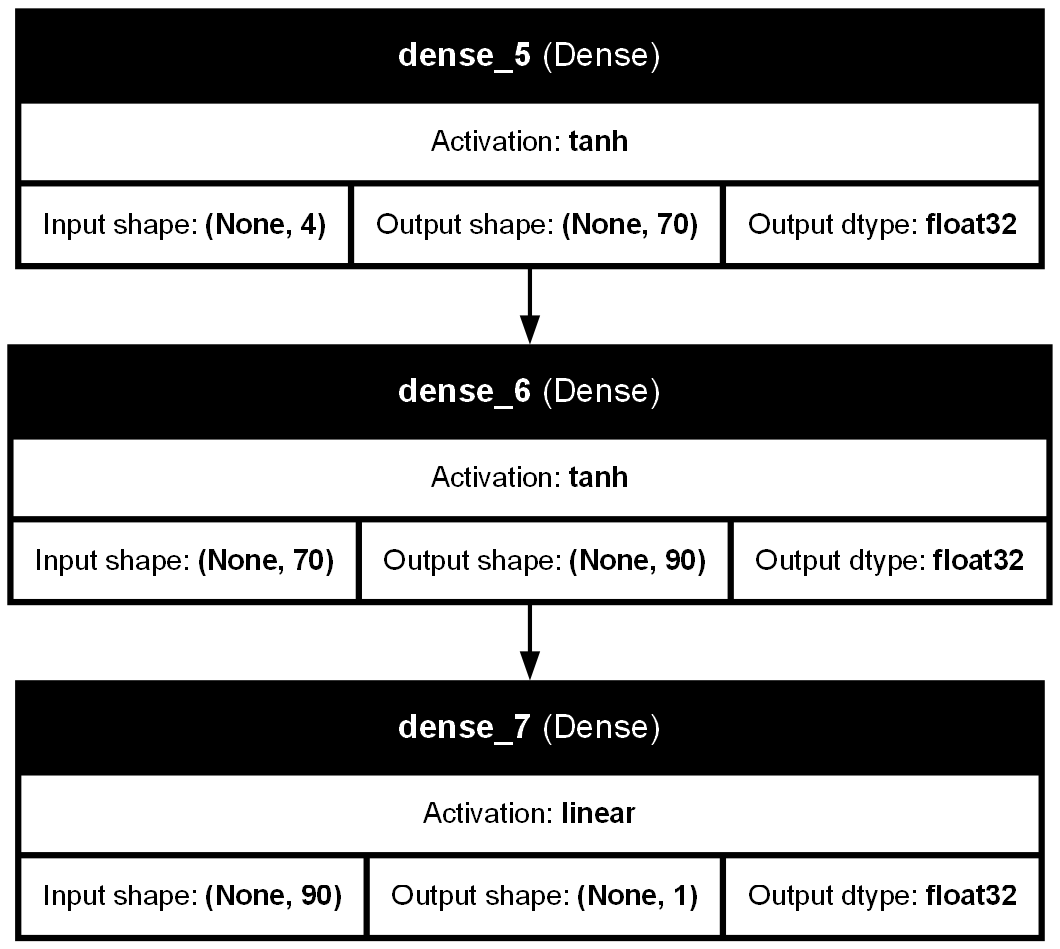

In [ ]:
from keras.utils import plot_model


plot_model(
        model,
        to_file='model_architecture_detailed.png',
        show_shapes=True,         
        show_dtype=True,          
        show_layer_names=True,     
        show_layer_activations=True,  
        expand_nested=True,        
        dpi=150,                 
        rankdir='TB'            
    )

#### Optuna Classifier

In [7]:
class_model = joblib.load('OptunaClassifier.joblib')

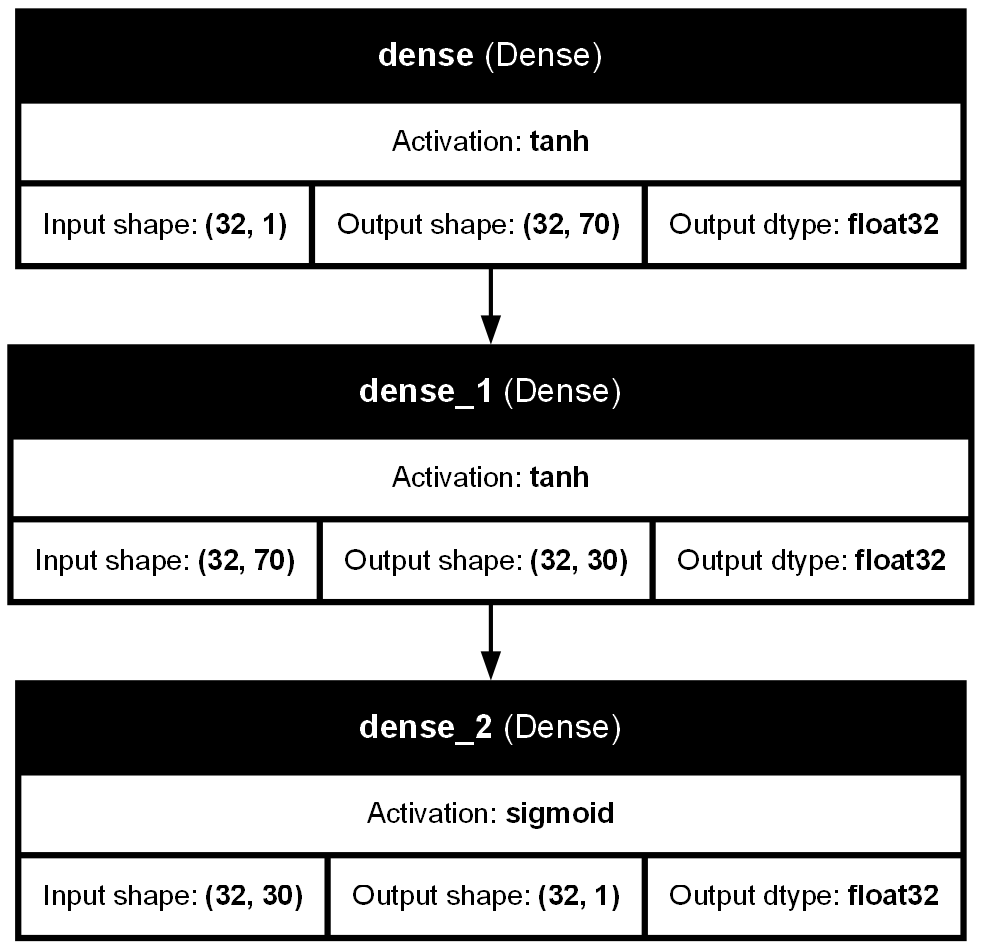

In [10]:
plot_model(
        class_model,
        show_shapes=True,         
        show_dtype=True,          
        show_layer_names=True,     
        show_layer_activations=True,  
        expand_nested=True,        
        dpi=150,                 
        rankdir='TB'            
    )

### Инференс модели

#### Классифкация

> Будет ли метеор Апофис (99942) со значением звёздной величины 19.7 опасен для Земли?

In [12]:
import pandas as pd

In [22]:
scaler = joblib.load('scaler')

In [23]:
x_apofis = {'abs_magnitude': [19.7]}
x_apofis= pd.DataFrame(x_apofis)
scaled_data = scaler.transform(x_apofis)

In [27]:
prediction = class_model.predict(scaled_data)
prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


np.float32(0.5716152)

Вероятность потенциальной угрозы Апофис (99942) составляет **0.57** 

#### Регрессия

по неизвестным причинам я решил купить себе дом в городе Мумбаи

> Сколько предположительно будет стоить дом в элитном районе с 5 душевыми комнатами и площадью 5000 кв.фунтов?

(координаты  latitude = 19.0686, longitude = 72.8394) 

In [36]:
model = joblib.load('KerasRegressor_tuner.joblib')

In [33]:
scaler_reg  = joblib.load('scaler_reg')

In [35]:
my_home = {'area': [5000],
           'latitude': [19.0686],
           "longitude": [72.8394],
           "bathrooms": [5]
           }

my_home = pd.DataFrame(my_home)
scaled_home = scaler_reg.transform(my_home)

In [41]:
price_my_home = model.predict(scaled_home)
price_my_home[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


np.float32(199.75175)

Потенциальная цена моего жилья будет составлять **199.75** _млн. рупий_,  примерно 181,77 млн рублей 


### <span style = "color:rgb(132, 215, 184) ">Реализация многослойного перцептрона</span>

In [ ]:
from ml_library.lab7_custom_mlp import Affine, NeuralNetwork, SGD, Sigmoid, ReLU, MSELoss, BinaryCrossEntropyLoss

#### Задача регрессии

In [ ]:
input_dim = 4  
hidden_dim = 32


output_dim = 1 

layers = [
    Affine([input_dim, hidden_dim]),
    ReLU(),
    Affine([hidden_dim, output_dim]),
    ReLU(),

]

In [446]:
loss_fn = MSELoss()

In [447]:
optimizer = SGD(learning_rate=0.01)

In [448]:
net = NeuralNetwork(layers, loss_fn, optimizer)

In [456]:
net.fit(X_reg_train, y_reg_train, 4000)

эпоха 0 потеря 173.4001
эпоха 1 потеря 176.6383
эпоха 2 потеря 173.3119
эпоха 3 потеря 176.6864
эпоха 4 потеря 173.5106
эпоха 5 потеря 176.6822
эпоха 6 потеря 173.2985
эпоха 7 потеря 176.6663
эпоха 8 потеря 173.5862
эпоха 9 потеря 176.6609
эпоха 10 потеря 173.1978
эпоха 11 потеря 176.2692
эпоха 12 потеря 173.0562
эпоха 13 потеря 175.8707
эпоха 14 потеря 172.5812
эпоха 15 потеря 175.3420
эпоха 16 потеря 172.0770
эпоха 17 потеря 174.7041
эпоха 18 потеря 171.4101
эпоха 19 потеря 173.5708
эпоха 20 потеря 170.8521
эпоха 21 потеря 173.1820
эпоха 22 потеря 170.4484
эпоха 23 потеря 172.4240
эпоха 24 потеря 169.9724
эпоха 25 потеря 172.1120
эпоха 26 потеря 169.4369
эпоха 27 потеря 171.3168
эпоха 28 потеря 169.2986
эпоха 29 потеря 171.4664
эпоха 30 потеря 169.3390
эпоха 31 потеря 171.5189
эпоха 32 потеря 169.2452
эпоха 33 потеря 171.3178
эпоха 34 потеря 169.2703
эпоха 35 потеря 171.6054
эпоха 36 потеря 169.5654
эпоха 37 потеря 171.8963
эпоха 38 потеря 169.7242
эпоха 39 потеря 172.3413
эпоха 40 п

In [457]:
y_test_predict = net.predict(X_reg_test)

In [458]:
y_test_predict = pd.Series(y_test_predict.flatten())

In [459]:
y_test_predict

0       16.519737
1       10.084286
2       24.182792
3       19.426123
4       31.585883
          ...    
1243    53.743506
1244    19.905134
1245    14.585155
1246    17.217654
1247    26.179235
Length: 1248, dtype: float64

In [460]:
y_reg_test = y_reg_test.reset_index(drop=True)

In [461]:
print_error(y_reg_test, y_test_predict)

               Метрики качества
MAE                     8.05137
MSE                   228.10024
RMSE                   15.10299
MAPE                    0.41486
Adjusted_rand           0.00056
R^2                     0.66049


#### Задача классификации

In [21]:
layers_class = [
    Affine([1, 20]),
    ReLU(),
    Affine([20, 1]),
    Sigmoid()
]

loss_func_class = BinaryCrossEntropyLoss()
optimizer = SGD(learning_rate=0.2)
model_class = NeuralNetwork(layers_class, loss_func_class, optimizer)

In [23]:
model_class.fit(X_class_train, y_class_train,epochs=700)

эпоха 0 потеря 0.2637
эпоха 1 потеря 0.2637
эпоха 2 потеря 0.2637
эпоха 3 потеря 0.2637
эпоха 4 потеря 0.2637
эпоха 5 потеря 0.2637
эпоха 6 потеря 0.2637
эпоха 7 потеря 0.2637
эпоха 8 потеря 0.2637
эпоха 9 потеря 0.2637
эпоха 10 потеря 0.2637
эпоха 11 потеря 0.2636
эпоха 12 потеря 0.2636
эпоха 13 потеря 0.2636
эпоха 14 потеря 0.2636
эпоха 15 потеря 0.2636
эпоха 16 потеря 0.2636
эпоха 17 потеря 0.2636
эпоха 18 потеря 0.2636
эпоха 19 потеря 0.2636
эпоха 20 потеря 0.2636
эпоха 21 потеря 0.2636
эпоха 22 потеря 0.2636
эпоха 23 потеря 0.2636
эпоха 24 потеря 0.2636
эпоха 25 потеря 0.2636
эпоха 26 потеря 0.2636
эпоха 27 потеря 0.2636
эпоха 28 потеря 0.2636
эпоха 29 потеря 0.2636
эпоха 30 потеря 0.2636
эпоха 31 потеря 0.2636
эпоха 32 потеря 0.2636
эпоха 33 потеря 0.2636
эпоха 34 потеря 0.2636
эпоха 35 потеря 0.2636
эпоха 36 потеря 0.2636
эпоха 37 потеря 0.2636
эпоха 38 потеря 0.2636
эпоха 39 потеря 0.2636
эпоха 40 потеря 0.2636
эпоха 41 потеря 0.2636
эпоха 42 потеря 0.2636
эпоха 43 потеря 0.263

In [24]:
y_pred_class = model_class.predict(X_class_test)

In [26]:
y_pred_class = (y_pred_class > 0.5).astype(int).flatten()

In [27]:
y_pred_class = pd.Series(y_pred_class)

In [28]:
y_pred_class

0        0
1        0
2        1
3        0
4        1
        ..
13995    1
13996    1
13997    1
13998    0
13999    0
Length: 14000, dtype: int64

In [29]:
y_class_test = y_class_test.reset_index(drop=True)

In [30]:
y_class_test

0        0
1        0
2        1
3        0
4        1
        ..
13995    1
13996    1
13997    1
13998    0
13999    0
Name: danger, Length: 14000, dtype: int64

In [31]:
custom_classifier_metrics(y_class_test, y_pred_class)

                 Метрики качества
accuracy_score             0.9043
precision_score            0.8464
recall_score               0.9879
f1_score                   0.9117
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   5745     1255 |
Predicted  Class 1  |     85     6915 |
-----------------------------------


## Вывод по лабораторной работе

Лучшей моделью для решения задачи регрессии является ```KerasRegressor_tuner```: R2 = 0.78

Лучшей моделю для решения задачи классификации является ```OptunaClassifier``` на основе API Keras: f1_score = 0.913



--- 

Основываясь на предыдущих лабораторных метрики моделей FCNN хуже метрик **классических моделей машинного обучения** (```GradientBoostingRegressor```: R2 = 0.9, ```BaggingClassofier```, F1 = 0.92)